# QUESTION 1

In [47]:
# Datetine range
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
n=0
mindate = None
maxdate = None

def update_dt(n, dto, mindate, maxdate):
    if n == 1:
        mindate = dto
        maxdate = dto
    elif dto < mindate:
        mindate = dto
    elif dto > maxdate:
        maxdate = dto
    return mindate, maxdate

for i, row in enumerate(reader):
    if i==0:continue  #Skip header
    n += 1 # row count
    p_dto, d_dto = None, None
    p_dts = row[5].replace(' ',':')
    d_dts = row[6].replace(' ',':')
    try:
        p_dto = datetime.datetime.strptime(p_dts, "%Y-%m-%d:%H:%M:%S")
    except Exception as e:
        print(e)
    try:
        d_dto = datetime.datetime.strptime(d_dts, "%Y-%m-%d:%H:%M:%S")
    except Exception as e:
        print(e)
    if p_dto is not None:
        mindate, maxdate = update_dt(n, p_dto, mindate, maxdate)
    if d_dto is not None:
        mindate, maxdate = update_dt(n, d_dto, mindate, maxdate)
        
print('Datetime Range:', mindate,' to ', maxdate, '\nNumber of Rows:', n)
f.close()

Datetime Range: 2013-03-01 00:00:00  to  2013-04-01 01:16:32 
Number of Rows: 15749228


# QUESTION 2

In [2]:
#Field names
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)

ss = 'Field Names | Description\n------ | ------\n'
for row in reader:
    for field in row:
        ss+=field+'|-\n'
    break
print(ss)
f.close()

Field Names | Description
------ | ------
medallion|-
 hack_license|-
 vendor_id|-
 rate_code|-
 store_and_fwd_flag|-
 pickup_datetime|-
 dropoff_datetime|-
 passenger_count|-
 trip_time_in_secs|-
 trip_distance|-
 pickup_longitude|-
 pickup_latitude|-
 dropoff_longitude|-
 dropoff_latitude|-



# QUESTION 3

In [23]:
#Field names
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
dic =  []
ss = 'Field Names | Sample Data\n-- | --\n'
for i, row in enumerate(reader):
    if i==0:
        dic=row
    if i==1:
        for e in range(len(dic)):
            ss+=dic[e]+'|'+row[e]+'\n'
        break
print(ss)
f.close()

Field Names | Sample Data
-- | --
medallion|FE7B354FEB67B9C94BD34EA54469691C
 hack_license|2C78614ADC9C602EC70D65CCB4E63B14
 vendor_id|CMT
 rate_code|1
 store_and_fwd_flag|N
 pickup_datetime|2013-03-01 00:00:04
 dropoff_datetime|2013-03-01 00:19:03
 passenger_count|1
 trip_time_in_secs|1138
 trip_distance|14.30
 pickup_longitude|-73.776703
 pickup_latitude|40.645164
 dropoff_longitude|-73.913925
 dropoff_latitude|40.772614



# QUESTION 4

In [4]:
import csv, time,datetime

def getCount(e):
    i,max_len, dec_len=0,0,0
    f = open(fn,'r')
    reader = csv.reader(f)
    for row in reader:
        i+=1
        if i==1:continue
        if '.' in row[e]:
            val1=len(str(float(row[e])).replace('.','').replace('-','')) #before the decimal point
            val2=len(str(float(row[e])).split('.')[1]) # after the decimal point
            if max_len < val1:
                max_len=val1
            if dec_len < val2:
                dec_len=val2
    return '('+str(max_len)+','+str(dec_len)+')'

def getCount2(e,d_type):
    i, max_len=0,0
    f = open(fn,'r')
    reader = csv.reader(f)
    for row in reader:
        i+=1
        if i==1:continue
        if d_type=='int':
            val=len(row[e].replace('-',''))
            if max_len < val:
                max_len = val
        elif d_type=='var':
            val=len(row[e])
            if max_len < val:
                max_len = val
    return '('+str(max_len)+')'


fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
field_names=[]
d_type=''
for i, row in enumerate(reader):
    if i==2:break
    if i==0:
        field_names=row
        continue
    ss = 'Field Names | Sample Data\n------ | ------\n'
    if i==1:
        for e in range(len(row)):
            try:
                dto = datetime.datetime.strptime(row[e].replace(' ',':'), "%Y-%m-%d:%H:%M:%S")
                d_type='datetime'
            except Exception as k:
                if '.' in row[e]: # is decimal
                    count = getCount(e)
                    d_type='decimal'+count
                else:
                    try:
                        val=int(row[e])
                        count = getCount2(e,'int')
                        d_type='int'+count
                    except Exception as k:
                        count = getCount2(e,'var')
                        d_type='varchar'+count
            ss+=field_names[e]+'|'+d_type+'\n'
print(ss)
f.close()

Field Names | Sample Data
------ | ------
medallion|varchar(32)
 hack_license|varchar(32)
 vendor_id|varchar(3)
 rate_code|int(3)
 store_and_fwd_flag|varchar(1)
 pickup_datetime|datetime
 dropoff_datetime|datetime
 passenger_count|int(3)
 trip_time_in_secs|int(5)
 trip_distance|decimal(4,2)
 pickup_longitude|decimal(12,11)
 pickup_latitude|decimal(11,10)
 dropoff_longitude|decimal(12,11)
 dropoff_latitude|decimal(11,10)



# QUESTION 5

In [44]:
# 5.	What is the geographic range of your data (min/max - X/Y)?
# a.	Plot this (approximately on a map)

import csv, time,datetime
fn = 'trip_data_3.csv'
ss = 'Coordinate | Min | Max | Range\n----- | --- | --- | ---\n'
min_lon, min_lat, max_lon, max_lat=100.0,100.0,-180,0.0


def update_cord(lon, lat, min_lon, min_lat, max_lon, max_lat):
    if min_lon > lon:
        min_lon=lon
    if max_lon < lon:
        max_lon=lon
    if min_lat > lat:
        min_lat=lat
    if max_lat < lat:
        max_lat=lat
    return min_lon, min_lat, max_lon, max_lat
    
i, min_, max_=0,100,0
f = open(fn,'r')
reader = csv.reader(f)
for row in reader:
    i+=1
    if i==1:continue
    p_lon=row[10]
    p_lat=row[11]
    d_lon=row[12]
    d_lat=row[13]
    if '.' in p_lon and '.' in p_lat: #it's a valid decimal
        #validate lon & lat to be in NY region
        if not float(-79.7624)<=float(p_lon)<=float(-71.7517): continue
        if not float(40.4772)<=float(p_lat)<=float(45.0153): continue
        min_lon, min_lat, max_lon, max_lat = update_cord(float(p_lon), float(p_lat), min_lon, min_lat, max_lon, max_lat)
    
    if '.' in d_lon and '.' in d_lat: #it's a valid decimal
        #validate lon & lat to be in NY region
        if not float(-79.7624)<=float(d_lon)<=float(-71.7517): continue
        if not float(40.4772)<=float(d_lat)<=float(45.0153): continue
        min_lon, min_lat, max_lon, max_lat = update_cord(float(d_lon), float(d_lat), min_lon, min_lat, max_lon, max_lat)
        
ss+='Longitude|'+str(min_lon)+'|'+str(max_lon)+'|'+str(max_lon-min_lon)+'\n'
ss+='Latitude|'+str(min_lat)+'|'+str(max_lat)+'|'+str(max_lat-min_lat)+'\n'
f.close()
print(ss)

Coordinate | Min | Max | Range
----- | --- | --- | ---
Longitude|-79.73333|-71.800003|7.933326999999991
Latitude|40.477215|44.983334|4.506118999999998



# QUESTION 6

In [79]:
from math import radians, cos, sin, asin, sqrt
import csv, time,datetime

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in miles
    return c * r

fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
trip_d=[]
dhist={}
i = 0
for row in reader:
    i+=1
    if i==1:continue # skip header row
    p_lon=row[10]
    p_lat=row[11]
    d_lon=row[12]
    d_lat=row[13]
    if '.' in p_lon and '.' in p_lat and '.' in d_lon and '.' in d_lat: #it's a valid decimal
        #ensure lon & lat are valid NY coordinates
        if not float(-79.7624)<=float(p_lon)<=float(-71.7517): continue
        if not float(40.4772)<=float(p_lat)<=float(45.0153): continue
        if not float(-79.7624)<=float(d_lon)<=float(-71.7517): continue
        if not float(40.4772)<=float(d_lat)<=float(45.0153): continue
        dist = haversine(float(p_lon), float(p_lat), float(d_lon), float(d_lat))
        trip_d.append(dist)

for d in trip_d:
    r = d//50
    if r == float(0):
        key='0-50'
        if key in dhist:
            dhist[key]+=1
        else:
            dhist[key]=1
    else:
        key=str(int(50.0*r)+1)+'-'+str(int(50.0*(r+1.0)))
        if key in dhist:
            dhist[key]+=1
        else:
            dhist[key]=1

s = 'Trip Distance Range | Total count \n---|--\n'
for k,v in dhist.items():
    s+=str(k)+'|'+str(v)+'\n'
print(s)

ss = 'Trip Distance | Value \n---|--\n'  
ss+='Minimum|'+ str(min(trip_d))+'\n'
ss+='Maximum|'+str(max(trip_d))+'\n'
ss+='Average|'+str(sum(trip_d)/len(trip_d))+'\n'
print(ss)

f.close()

Trip Distance Range | Total count 
---|--
0-50|15447054
251-300|85
51-100|233
101-150|100
201-250|85
151-200|87
351-400|1
301-350|5

Trip Distance | Value 
---|--
Minimum|0.0
Maximum|393.60494339271463
Average|2.076935784621777



# QUESTION 7

In [78]:
import csv, time,datetime
import matplotlib.pyplot as plt
fn = 'trip_data_3.csv'

hist={}
for pos in range(14):
    key=''
    f = open(fn,'r')
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i==0:
            key = row[pos]
            hist[key]=[]
            continue
        content = row[pos]
        if content not in hist[key]:
            hist[key].append(content)
        if len(hist[key]) > 20:
            hist.pop(key, None)
            break
  
s = 'Field Names | Distinct Values \n---|--\n'
for k,v in hist.items():
    s+=str(k)+'|'+str(v).replace('[','').replace(']','')+'\n'
print(s)
f.close()

Field Names | Distinct Values 
---|--
 vendor_id|'CMT', 'VTS'
 rate_code|'1', '2', '5', '3', '4', '6', '0', '210', '9', '7', '8', '17'
 store_and_fwd_flag|'N', 'Y', ''
 passenger_count|'1', '2', '4', '3', '5', '6', '0', '9', '7', '255'



# QUESTION 8

In [30]:
import csv, time,datetime
fn = 'trip_data_3.csv'
ss = 'Field Names | Min | Max | Comments\n----- | --- | ---|--\n'
for pos in [3,7,8,]:
    f_n=''
    i, min_, max_=0,100,0
    f = open(fn,'r')
    reader = csv.reader(f)
    for row in reader:
        i+=1
        if i==1:
            f_n=row[pos]
            continue
        val=int(row[pos])
        if min_ > val:
            min_=val
        if max_ < val:
            if pos==7:
                if val<=9:
                    max_=val
            else:
                max_=val    
    ss+=f_n+'|'+str(min_)+'|'+str(max_)+'|-\n'
    f.close()
print(ss)

Field Names | Min | Max | Comments
----- | --- | ---|--
 rate_code|0|210|-
 passenger_count|0|9|-
 trip_time_in_secs|0|10800|-



# QUESTION 9

In [80]:
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
hrhist={}
x,y=[],[]

for i, row in enumerate(reader):
    if i==0:continue  #Skip header
    hr = int(row[5].split()[1].split(':')[0])
    pass_count=int(row[7])
    if hr in hrhist:
        hrhist[hr].append(pass_count)
    else:
        hrhist[hr]=[pass_count]
#         print('first',hrhist)
for k,v in hrhist.items():
    x.append(k)
    y.append(sum(v)/29)

f.close()

# QUESTION 10

In [33]:
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)

f2 = open('trip_data_3_subset.csv','w')
writer = csv.writer(f2,delimiter=',',lineterminator='\n')
for i, row in enumerate(reader):
    if i==0:
        writer.writerow(row) #Write field names
        continue
    if i%1000==0:
        writer.writerow(row)
f.close()
f2.close()

#Check max row of the subset data
fn = 'trip_data_3_subset.csv'
f = open(fn,'r')
n=0
reader = csv.reader(f)
for i, row in enumerate(reader):
    if i==0:continue # Skip the header row
    n+=1
print('The subset data has', n, 'rows')

The subset data has 15749 rows


# QUESTION 11

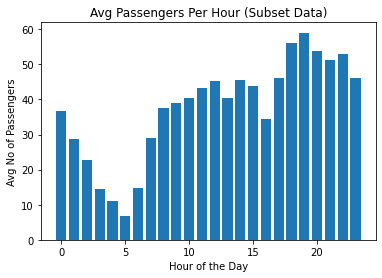

In [46]:
import csv, time,datetime
fn = 'trip_data_3_subset.csv'
f = open(fn,'r')
reader = csv.reader(f)
hrhist={}
x,y=[],[]

for i, row in enumerate(reader):
    if i==0:continue  #Skip header
    hr = int(row[5].split()[1].split(':')[0])
    pass_count=int(row[7])
    if hr in hrhist:
        hrhist[hr].append(pass_count)
    else:
        hrhist[hr]=[pass_count]
#         print('first',hrhist)
for k,v in hrhist.items():
    x.append(k)
    y.append(sum(v)/29)

f.close()